<a href="https://colab.research.google.com/github/premdevarapalli/ai-collection/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Project On Diabetes Prediction Using AI/ML
# Changes Made on 11/01/2024 by PREM DEVARAPALLI
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd

# Load the dataset
file_path = '/content/drive/My Drive/Diabetes_data_set.zip'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Display the shape of the dataset
data_shape = data.shape
print(f"Dataset Shape: {data_shape}")


Dataset Shape: (100000, 9)


In [ ]:
# Display information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Summary statistics
data.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Unique values for categorical columns
for column in ['gender', 'smoking_history']:
    print(f"\nUnique values in {column} column:")
    print(data[column].value_counts())



Unique values in gender column:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Unique values in smoking_history column:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create copies of the data for preprocessing
data_preprocessed = data.copy()

# Encoding categorical variables
# Encode 'gender' with Label Encoding
label_encoder = LabelEncoder()
data_preprocessed['gender'] = label_encoder.fit_transform(data_preprocessed['gender'])

# One-Hot Encoding for 'smoking_history' (to preserve all categories, including "No Info")
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['smoking_history'], drop_first=True)

# Normalizing continuous variables
scaler = StandardScaler()
data_preprocessed[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(
    data_preprocessed[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
)

# Display the preprocessed data head to confirm changes
data_preprocessed_head = data_preprocessed.head()
data_preprocessed_head


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,1.692704,0,1,-0.321056,1.001706,0.047704,0,False,False,False,True,False
1,0,0.538006,0,0,-0.000116,1.001706,-1.426210,0,False,False,False,False,False
2,1,-0.616691,0,0,-0.000116,0.161108,0.489878,0,False,False,False,True,False
3,0,-0.261399,0,0,-0.583232,-0.492690,0.416183,0,True,False,False,False,False
4,1,1.515058,1,1,-1.081970,-0.679490,0.416183,0,True,False,False,False,False


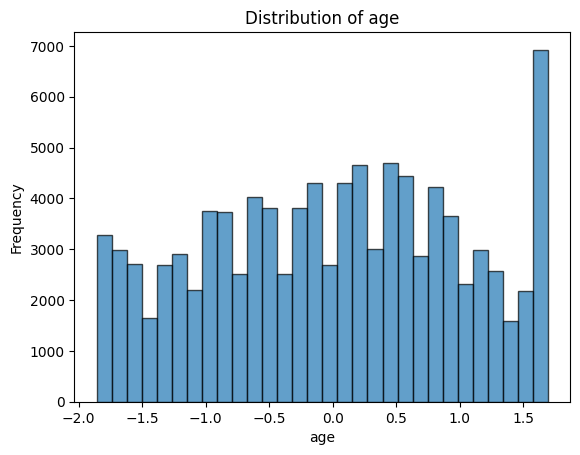

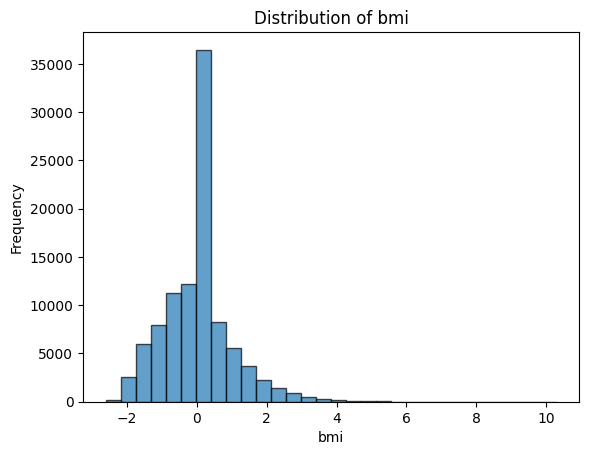

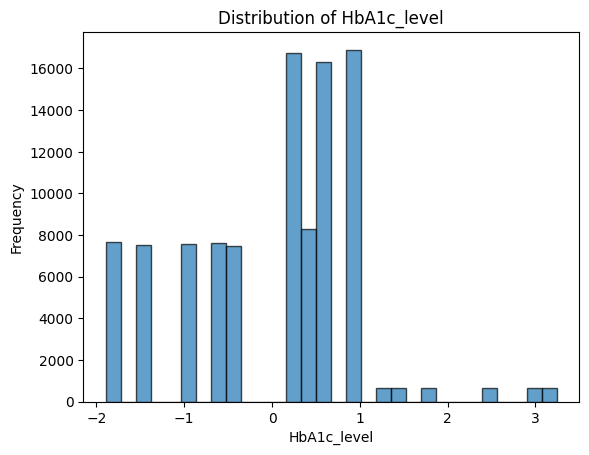

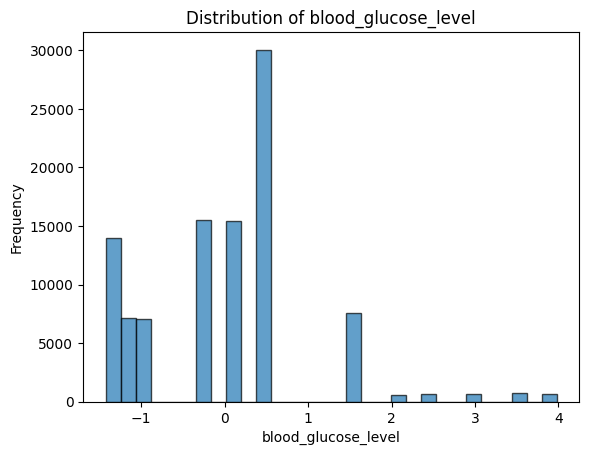

In [ ]:
import matplotlib.pyplot as plt

# Setting up plots for univariate analysis of numerical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Plot histograms for each numerical feature
for feature in numerical_features:
    plt.figure()
    plt.hist(data_preprocessed[feature], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


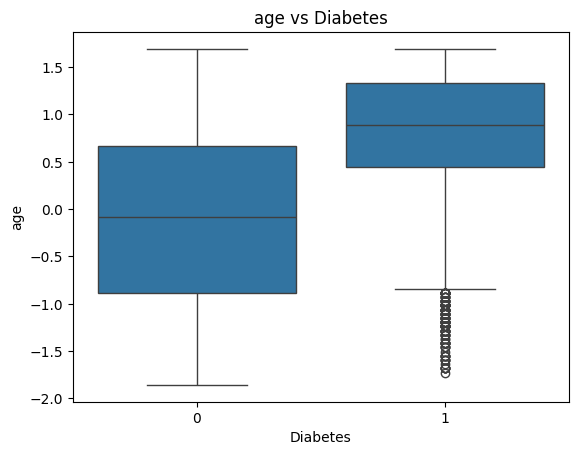

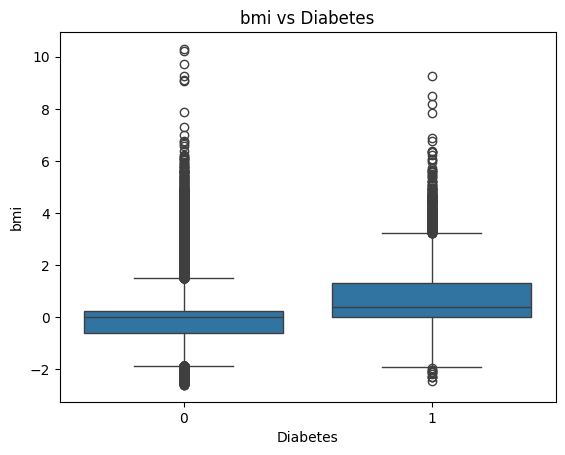

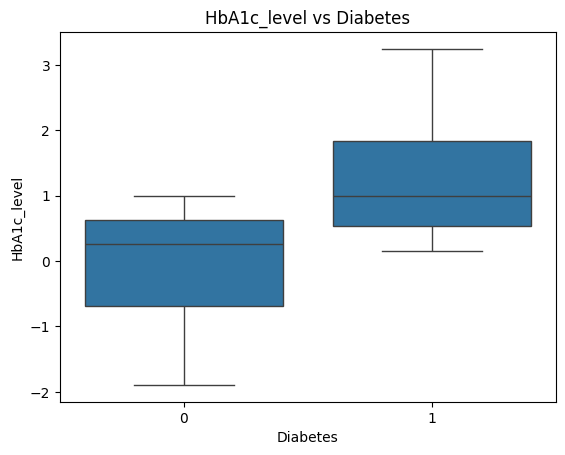

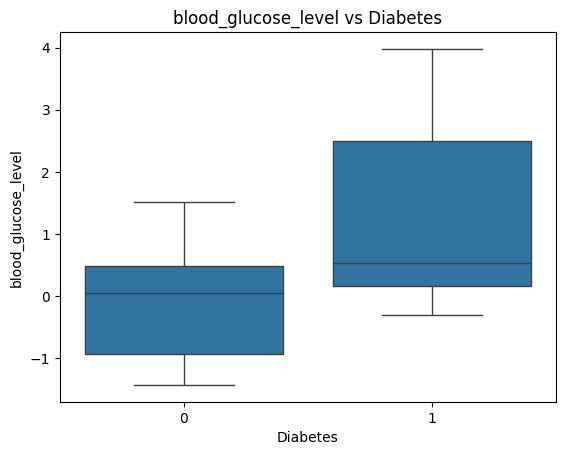

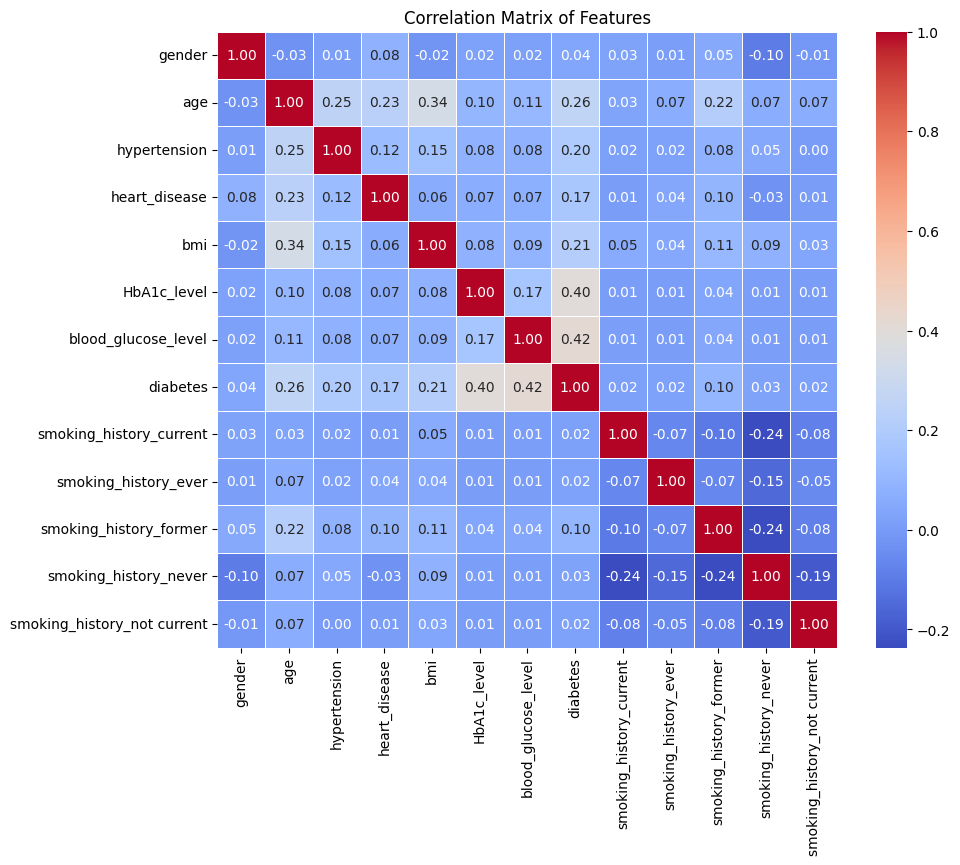

In [ ]:
import seaborn as sns

# Bivariate analysis: Relationship between each feature and the target variable (diabetes)
for feature in numerical_features:
    plt.figure()
    sns.boxplot(x='diabetes', y=data_preprocessed[feature], data=data_preprocessed)
    plt.title(f'{feature} vs Diabetes')
    plt.xlabel('Diabetes')
    plt.ylabel(feature)
    plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_preprocessed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


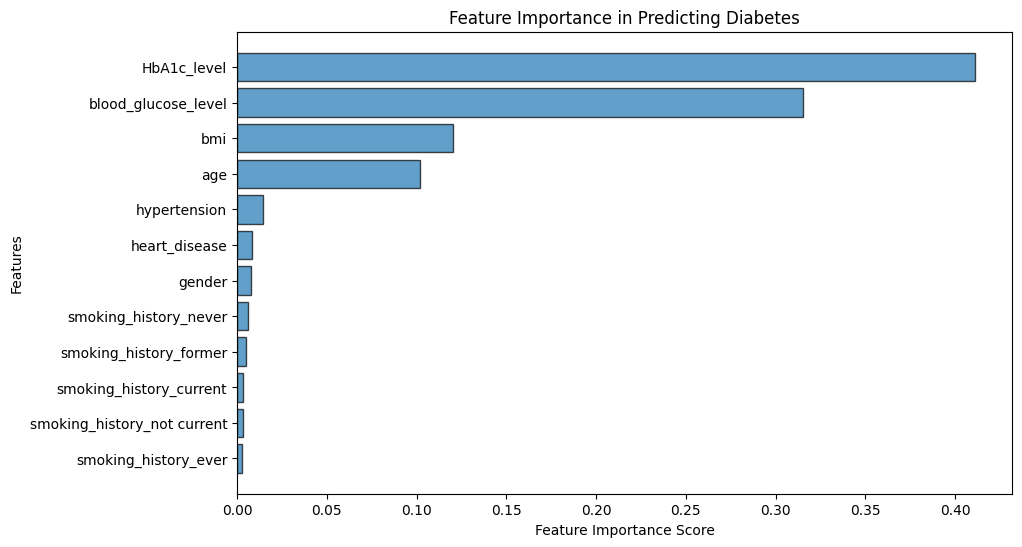

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Separate features and target variable
X = data_preprocessed.drop(columns=['diabetes'])
y = data_preprocessed['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
feature_importances = rf_model.feature_importances_
features = X.columns


# Sort and display feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], edgecolor='k', alpha=0.7)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting Diabetes')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


<ipython-input-44-9b18e7d20def>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_diabetes = data_preprocessed.groupby('age_group')['diabetes'].mean().reset_index()
<ipython-input-44-9b18e7d20def>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_category_diabetes = data_preprocessed.groupby('bmi_category')['diabetes'].mean().reset_index()


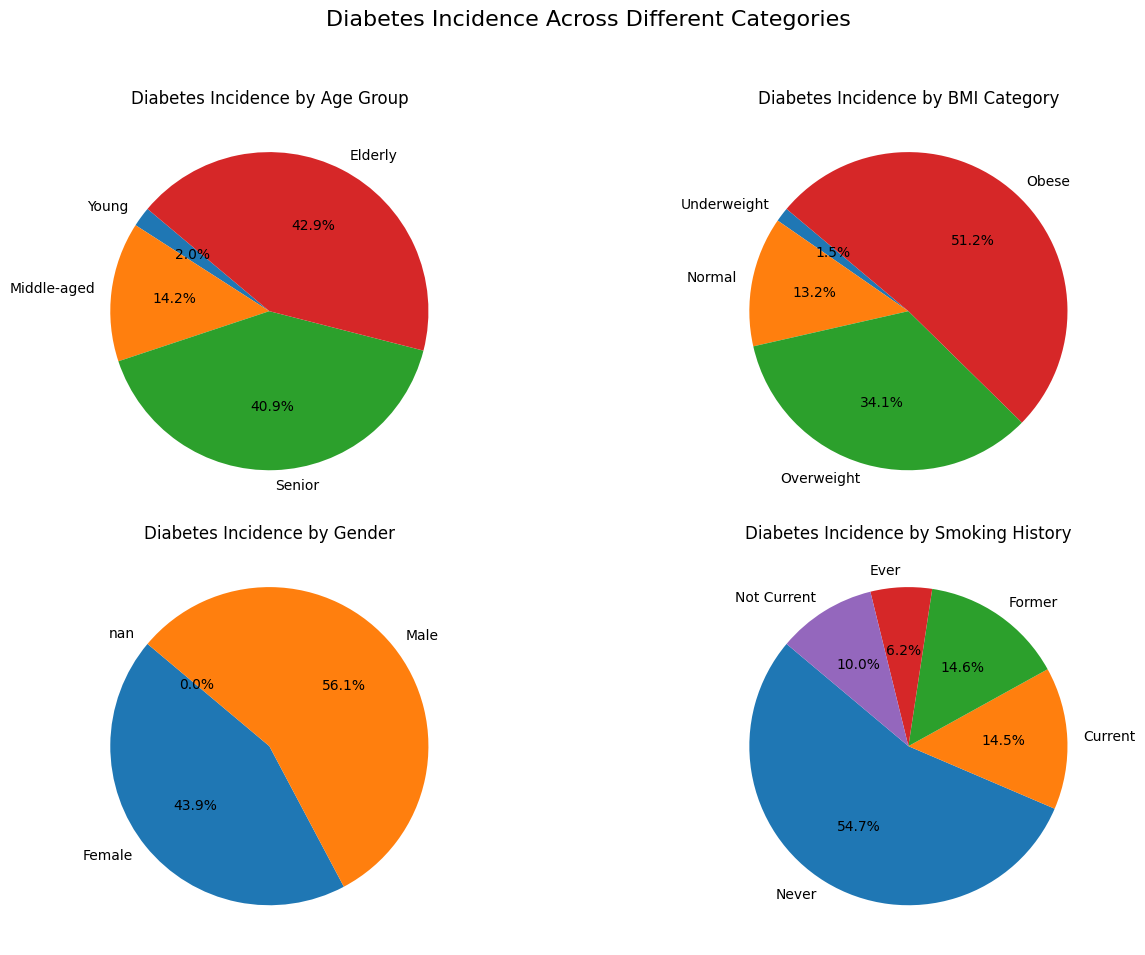

In [ ]:
import numpy as np

# age and BMI categories with numpy now imported
data_preprocessed['age_group'] = pd.cut(data_preprocessed['age'], bins=[-np.inf, -0.5, 0.5, 1.5, np.inf], labels=["Young", "Middle-aged", "Senior", "Elderly"])
data_preprocessed['bmi_category'] = pd.cut(data_preprocessed['bmi'], bins=[-np.inf, -1.5, 0.5, 1.5, np.inf], labels=["Underweight", "Normal", "Overweight", "Obese"])

# Calculating diabetes incidence for categorical variables as before
# Age Group and BMI Category incidence
age_group_diabetes = data_preprocessed.groupby('age_group')['diabetes'].mean().reset_index()
bmi_category_diabetes = data_preprocessed.groupby('bmi_category')['diabetes'].mean().reset_index()

# Gender incidence
gender_diabetes = data_preprocessed.groupby('gender')['diabetes'].mean().reset_index()
gender_diabetes['gender'] = gender_diabetes['gender'].map({0: 'Female', 1: 'Male'})

# Smoking History incidence
smoking_diabetes = pd.DataFrame({
    'smoking_history': ['Never', 'Current', 'Former', 'Ever', 'Not Current'],
    'diabetes': [
        data_preprocessed['smoking_history_never'].mean(),
        data_preprocessed['smoking_history_current'].mean(),
        data_preprocessed['smoking_history_former'].mean(),
        data_preprocessed['smoking_history_ever'].mean(),
        data_preprocessed['smoking_history_not current'].mean()
    ]
})

# Plotting enhanced pie charts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Diabetes Incidence Across Different Categories", fontsize=16)

# Age Group Pie Chart
axes[0, 0].pie(age_group_diabetes['diabetes'], labels=age_group_diabetes['age_group'], autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Diabetes Incidence by Age Group')

# BMI Category Pie Chart
axes[0, 1].pie(bmi_category_diabetes['diabetes'], labels=bmi_category_diabetes['bmi_category'], autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Diabetes Incidence by BMI Category')

# Gender Pie Chart
axes[1, 0].pie(gender_diabetes['diabetes'], labels=gender_diabetes['gender'], autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Diabetes Incidence by Gender')

# Smoking History Pie Chart
axes[1, 1].pie(smoking_diabetes['diabetes'], labels=smoking_diabetes['smoking_history'], autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Diabetes Incidence by Smoking History')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




The pie charts display diabetes incidence across different categories with enhanced clarity:

**Diabetes Incidence by Age Group:** Highlights that Elderly and Senior groups have the highest incidence.

**Diabetes Incidence by BMI Category**: Shows that the Obese category has the highest diabetes rate, followed by Overweight.

**Diabetes Incidence by Gender:** Provides a comparison between Male and Female.

**Diabetes Incidence by Smoking History:** Shows incidence among different smoking behaviors, indicating variation based on smoking status.

**Key Points:**
**Non-Diabetic (Blue):**


*   HbA1c levels for non-diabetic individuals cluster primarily around 4.5% to 5.5%, which aligns with typical non-diabetic ranges (below 5.7%).
*   There is a sharp peak in the HbA1c distribution just below 5%, indicating that most non-diabetic individuals fall into this range.

**Diabetic (Orange):**

*   HbA1c levels for diabetic individuals are spread more broadly from about 5.5% to 9%.
*   The distribution shows a peak around 6.5% to 7%, aligning with typical diabetic ranges (6.5% and above is indicative of diabetes).
*   A portion of diabetic individuals also have HbA1c levels above 7.5%, indicating poor blood sugar control.


**Conlclusion**


*   The graph clearly shows that most non-diabetic individuals have well-controlled HbA1c levels, while diabetic individuals tend to have higher, more spread-out HbA1c values.
*   The overlap around 5.5% might warrant close monitoring, as individuals in this range could be at risk of transitioning from a prediabetic to a diabetic state.



In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Importing train_test_split for data splitting
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression for model creation



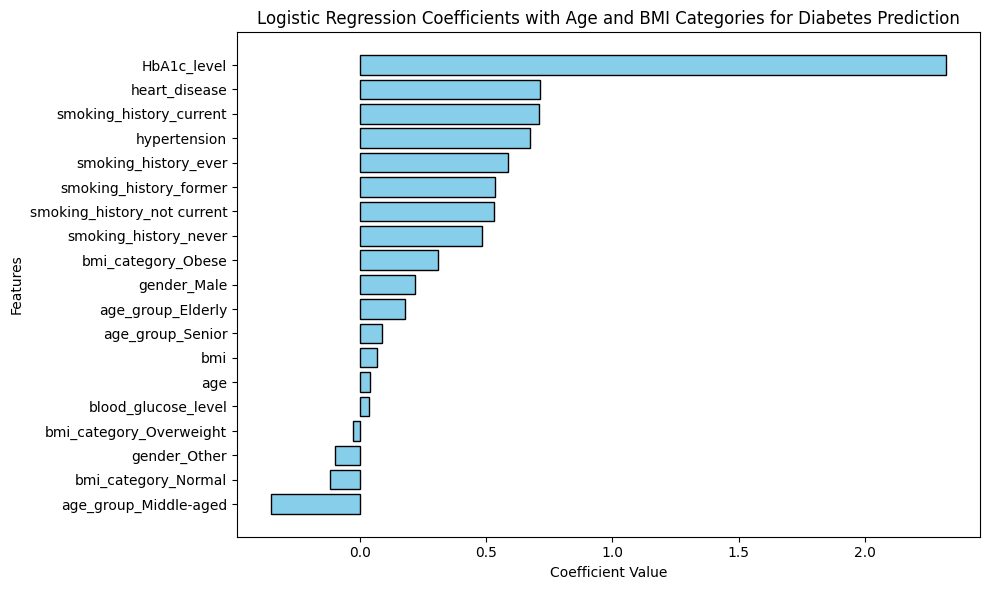

,Feature,Coefficient
0,HbA1c_level,2.323418
1,heart_disease,0.711547
2,smoking_history_current,0.706761
3,hypertension,0.674625
4,smoking_history_ever,0.587042
5,smoking_history_former,0.535614
6,smoking_history_not current,0.530461
7,smoking_history_never,0.481978
8,bmi_category_Obese,0.308145
9,gender_Male,0.218054


In [ ]:


# Re-creating the age and BMI categories
data['age_group'] = pd.cut(data['age'], bins=[-np.inf, 18, 40, 60, np.inf], labels=["Young", "Middle-aged", "Senior", "Elderly"])
data['bmi_category'] = pd.cut(data['bmi'], bins=[-np.inf, 18.5, 25, 30, np.inf], labels=["Underweight", "Normal", "Overweight", "Obese"])

# Encoding categorical variables including age_group and bmi_category
data_encoded = pd.get_dummies(data, columns=['gender', 'smoking_history', 'age_group', 'bmi_category'], drop_first=True)

# Separate features (X) and target (y)
X = data_encoded.drop(columns=['diabetes'])
y = data_encoded['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Extract coefficients and associate them with feature names
log_reg_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(log_reg_coefficients['Feature'], log_reg_coefficients['Coefficient'], color='skyblue', edgecolor='black')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Coefficients with Age and BMI Categories for Diabetes Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.tight_layout()
plt.show()

# Display the coefficients for review
log_reg_coefficients



**Key Insights:**
Top Positive Predictors:



1.   **HbA1c Level:** The strongest predictor for diabetes, as expected, with the highest coefficient.
2.   **Smoking History (Current, Ever)**: These have significant positive impacts, suggesting that current and former smokers are at higher risk of diabetes.
3.   **Heart Disease and Hypertension:** Both are strong positive predictors of diabetes risk, indicating comorbid conditions often associated with diabetes.

**Moderate Predictors:**

**Smoking History (Never, Not Current):** People who never smoked or quit smoking show some positive association, though weaker.
**Gender (Male):** Males have a slightly higher risk of diabetes compared to females.
**BMI and Age:** These have smaller coefficients, suggesting that when other factors (like HbA1c and smoking history) are accounted for, BMI and age alone are weaker predictors in this model.

**Negative Coefficients:**

1.   **Gender_Other: **This shows a small negative coefficient, but the group size may be small, leading to less impact.

**Summary:**
The visualization indicates that **HbA1c level** remains the most critical factor, followed by **smoking history, heart disease, and hypertension**. Features like BMI and age have smaller coefficients, likely because other factors contribute more strongly to diabetes prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation with 5 folds, to evaluate Random Forest & adding error handling
try:
    rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy', error_score='raise')
    print("Cross-Validation Mean Accuracy:", rf_cv_scores.mean())
    print("Cross-Validation Standard Deviation:", rf_cv_scores.std())
except ValueError as e:
    print("Error during cross-validation:", e)

# Fit and evaluate the model on the test set if cross-validation is successful
try:
    rf_model.fit(X_train, y_train)
    test_accuracy = rf_model.score(X_test, y_test)
    print("Test Set Accuracy:", test_accuracy)
except ValueError as e:
    print("Error during model fitting:", e)






Cross-Validation Mean Accuracy: 0.9702428571428572
Cross-Validation Standard Deviation: 0.001117212274058128
Test Set Accuracy: 0.9707


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Perform cross-validation with 5 folds on the training set to evaluate Logistic Regression
try:
    log_reg_cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring='accuracy', error_score='raise')
    print("Cross-Validation Mean Accuracy:", log_reg_cv_scores.mean())
    print("Cross-Validation Standard Deviation:", log_reg_cv_scores.std())

    # Fit and evaluate the model on the test set if cross-validation is successful
    log_reg_model.fit(X_train, y_train)
    test_accuracy_log_reg = log_reg_model.score(X_test, y_test)
    print("Test Set Accuracy:", test_accuracy_log_reg)
except ValueError as e:
    print("Error during cross-validation or model fitting:", e)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Mean Accuracy: 0.9610142857142858
Cross-Validation Standard Deviation: 0.0010530809996561262
Test Set Accuracy: 0.9590333333333333


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM(Support Vector Machine) model with a linear kernel and balanced class weights
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42, max_iter=1000)

# Perform cross-validation with 5 folds on the training set to evaluate SVM
try:
    svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy', error_score='raise')
    print("Cross-Validation Mean Accuracy:", svm_cv_scores.mean())
    print("Cross-Validation Standard Deviation:", svm_cv_scores.std())

    # Fit and evaluate the model on the test set if cross-validation is successful
    svm_model.fit(X_train, y_train)
    test_accuracy_svm = svm_model.score(X_test, y_test)
    print("Test Set Accuracy:", test_accuracy_svm)
except ValueError as e:
    print("Error during cross-validation or model fitting:", e)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

Cross-Validation Mean Accuracy: 0.6675
Cross-Validation Standard Deviation: 0.18860281665176581


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Test Set Accuracy: 0.6838333333333333


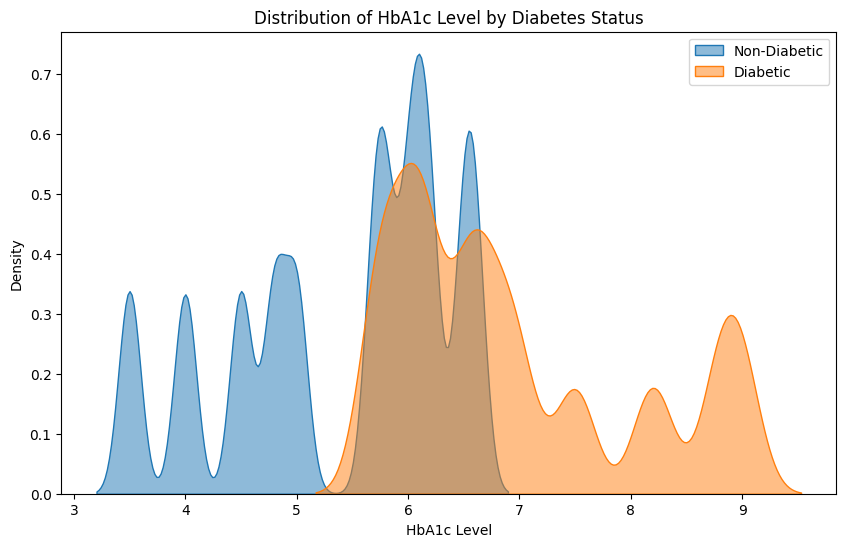

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data['HbA1c_level'] = pd.to_numeric(data['HbA1c_level'], errors='coerce')
data['blood_glucose_level'] = pd.to_numeric(data['blood_glucose_level'], errors='coerce')
data = data.dropna(subset=['HbA1c_level', 'blood_glucose_level'])

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['diabetes'] == 0], x="HbA1c_level", label="Non-Diabetic", fill=True, alpha=0.5)
sns.kdeplot(data=data[data['diabetes'] == 1], x="HbA1c_level", label="Diabetic", fill=True, alpha=0.5)
plt.title('Distribution of HbA1c Level by Diabetes Status')
plt.xlabel('HbA1c Level')
plt.ylabel('Density')
plt.legend()
plt.show()

